In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [44]:
df.isnull().sum()

age         0
bmi         0
children    0
charges     0
male        0
Smoker      0
dtype: int64

# Feature Engineering

In [10]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [12]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [14]:
df = df.rename(columns = {'yes':'Smoker'})

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [16]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Exploratory Analysis

C:\Users\arman\AppData\Local\Temp\ipykernel_24388\65274526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data= df, palette = 'GnBu')


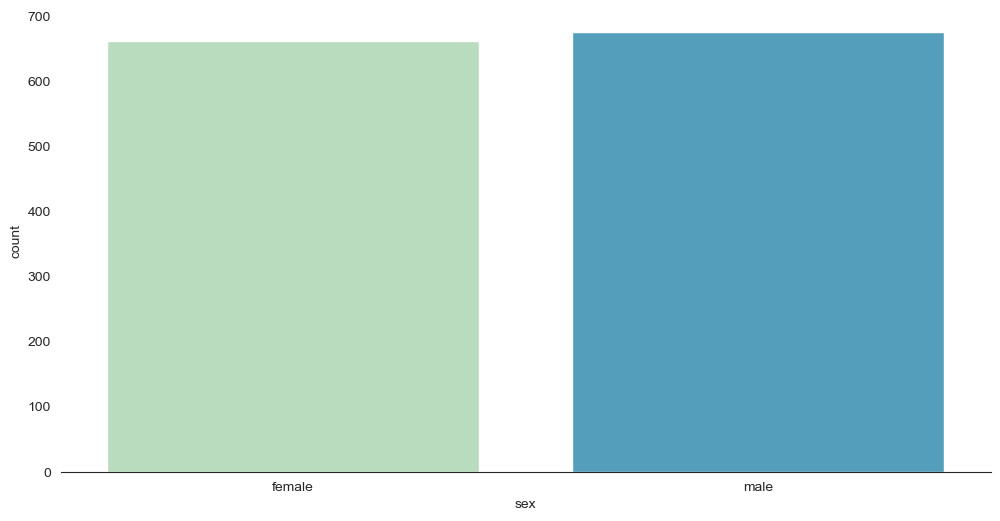

In [18]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

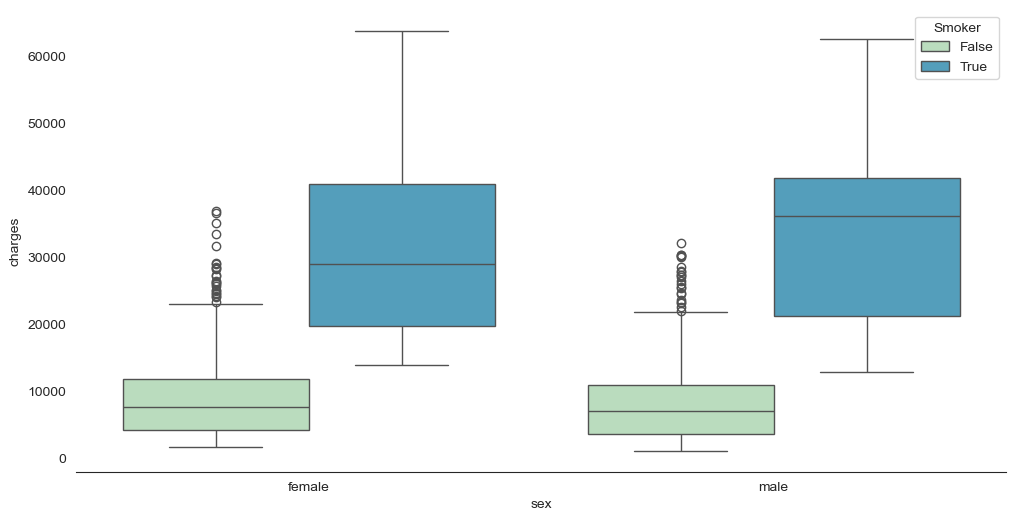

In [19]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

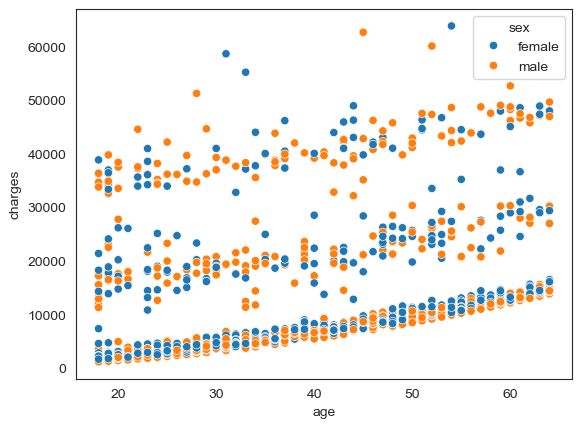

In [20]:

sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

<Axes: xlabel='age', ylabel='charges'>

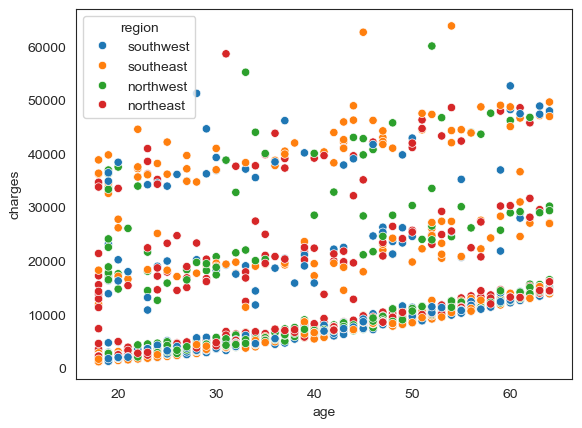

In [21]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

<Axes: xlabel='age', ylabel='charges'>

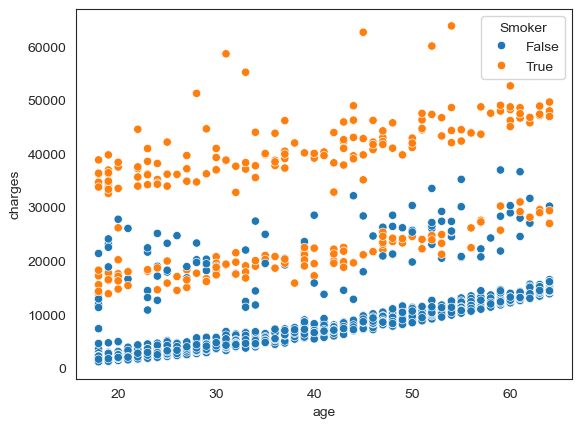

In [22]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

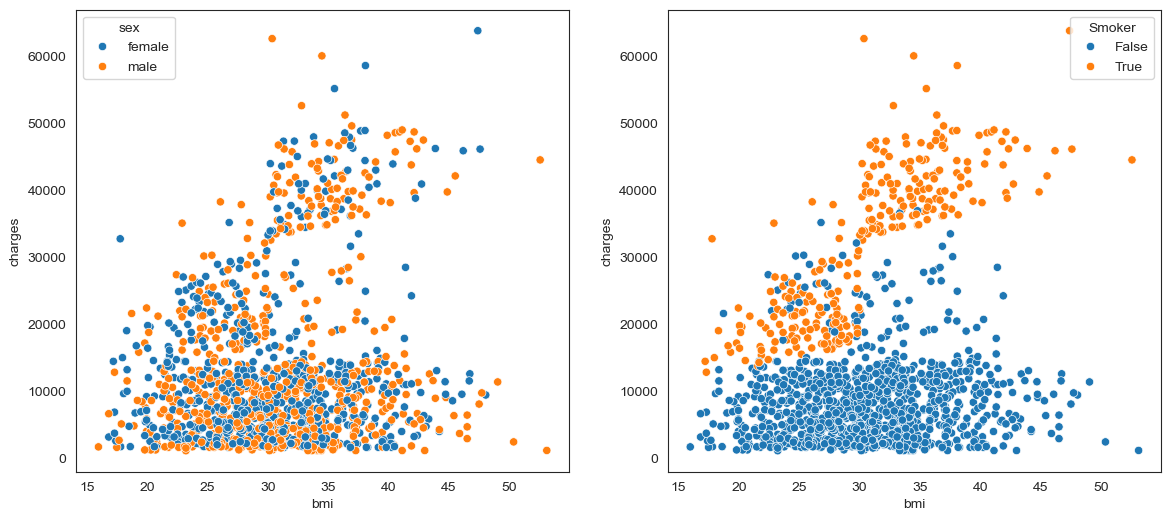

In [23]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

<Axes: xlabel='bmi', ylabel='charges'>

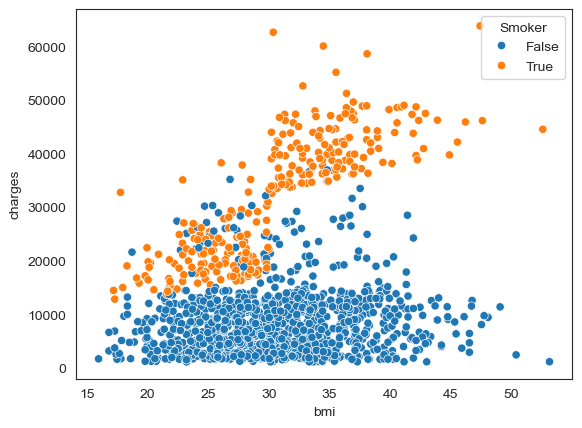

In [24]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker')

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [26]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

<Axes: >

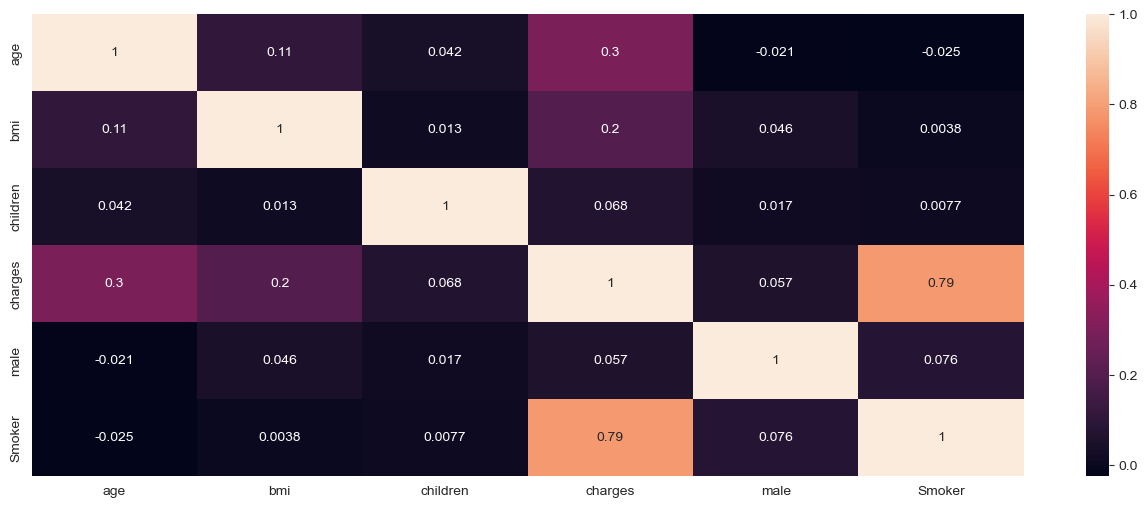

In [27]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

# Splitting the data

In [29]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [31]:
x_train.shape

(802, 5)

In [32]:
df.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [35]:
scaled_x_train

array([[ 0.4687953 , -0.78686922,  3.23720315,  0.99254648, -0.48749802],
       [ 0.68404749, -0.78023595, -0.08704387,  0.99254648, -0.48749802],
       [ 0.18179238, -0.09037528, -0.91810563,  0.99254648,  2.05129038],
       ...,
       [ 1.4015548 , -0.1185667 ,  1.57507964,  0.99254648,  2.05129038],
       [-0.32046274,  0.87393717, -0.08704387, -1.00750949, -0.48749802],
       [-1.54022516, -0.52817147, -0.08704387,  0.99254648,  2.05129038]])

# Support vector regression

In [37]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

In [38]:
predict

array([9475.48347323, 9523.79147785, 9502.23423642, 9482.04040134,
       9551.62407908, 9428.07829029, 9455.501075  , 9481.12615561,
       9422.5080375 , 9453.62559857, 9427.17948273, 9561.9865989 ,
       9543.43150468, 9486.11285885, 9537.81887205, 9458.28517617,
       9444.89371128, 9545.18795151, 9516.19892128, 9542.54069452,
       9512.80383917, 9506.46543541, 9559.75667029, 9425.05534733,
       9475.40166489, 9411.50466701, 9410.79120988, 9439.66158957,
       9451.38140748, 9554.69359305, 9414.25966653, 9414.88823366,
       9461.63249009, 9476.40357401, 9424.85757191, 9472.42764861,
       9547.19493089, 9454.51399812, 9480.07681113, 9440.4340733 ,
       9456.4448935 , 9444.95691478, 9535.27458904, 9427.98857286,
       9485.02756368, 9544.00524369, 9513.67476901, 9497.79883521,
       9504.73196043, 9508.41752965, 9530.14808604, 9503.95912787,
       9532.45978749, 9560.80668423, 9528.60812336, 9558.29776826,
       9558.04249607, 9546.88546662, 9416.59228817, 9520.89903

In [39]:
y_test

884      4877.98105
1156    39722.74620
735      9583.89330
594      5709.16440
569     45702.02235
           ...     
1013     8765.24900
523      5397.61670
17       2395.17155
585      4779.60230
611      6571.54400
Name: charges, Length: 536, dtype: float64

In [40]:
np.mean((y_test - predict)**2)

170531561.63883302

Text(0, 0.5, 'True Values')

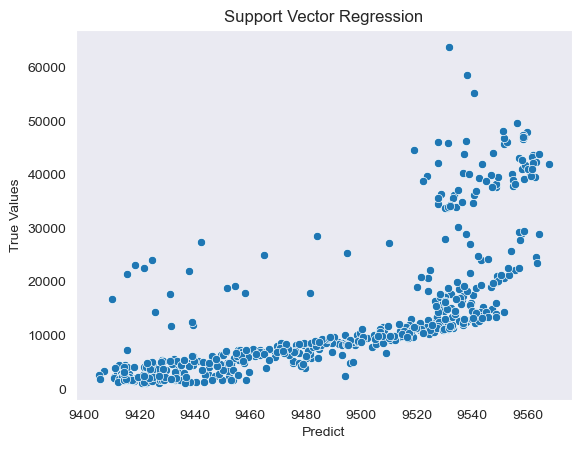

In [48]:
sns.set_style('dark')
f = sns.scatterplot(x=predict, y=y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')
f.set_ylabel('True Values')